In [147]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [196]:
dataset_path = 'auto-mpg.csv'
df = pd.read_csv(dataset_path, na_values='?', comment='\t', sep=',')

#df = pd.read_csv(dataset_path)
df = df.drop(columns='car name')
print(df.shape)
df.tail()

(398, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


mpg를 타겟변수로 삼는다.

In [197]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [198]:
# 훈련/테스트 분할
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler

df_train, df_test = sklearn.model_selection.train_test_split(df, train_size=0.8)
train_stats = df_train.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mpg,318.0,23.250943,7.811779,9.0,16.600,22.75,29.000,46.6
cylinders,318.0,5.531447,1.713912,3.0,4.000,4.50,8.000,8.0
displacement,318.0,198.482704,106.399820,68.0,101.750,156.00,302.000,455.0
horsepower,313.0,105.808307,39.440092,46.0,75.000,92.00,130.000,230.0
weight,318.0,3008.091195,864.979798,1613.0,2227.000,2869.00,3641.750,5140.0
acceleration,318.0,15.555031,2.794670,8.0,13.725,15.50,17.175,24.8
model year,318.0,75.937107,3.747867,70.0,73.000,76.00,79.000,82.0
origin,318.0,1.534591,0.788561,1.0,1.000,1.00,2.000,3.0


In [188]:
# X_train = df_train.drop(columns='mpg')
# y_train = df_train['mpg']
# X_test = df_test.drop(columns='mpg')
# y_test = df_test['mpg']

# X_test

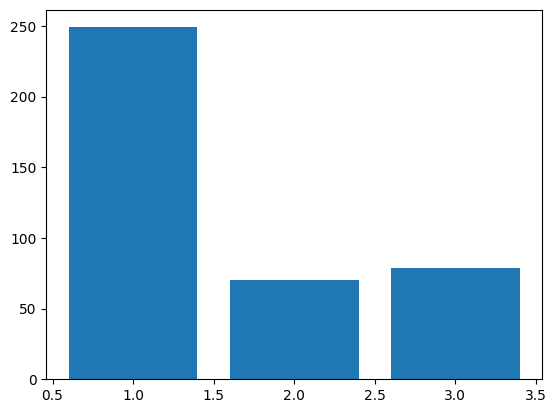

In [199]:
origin_count = df['origin'].value_counts()
plt.bar(origin_count.index, origin_count.values)
plt.show()

In [200]:
std = StandardScaler()
# X_train의 'model year' 열을 따로 저장하고 원본에서 제거

X_train_model_year = X_train['model year'].values.reshape(-1, 1)
X_train = X_train.drop(columns='model year')
X_train_origin = X_train['origin'].values.reshape(-1, 1)
X_train = X_train.drop(columns='origin')
# X_train 표준화
X_train_norm = std.fit_transform(X_train)
# 표준화된 X_train에 'model year' 열을 추가
X_train_norm = np.hstack((X_train_norm, X_train_model_year, X_train_origin))

# X_test의 'model year' 열을 따로 저장하고 원본에서 제거
X_test_model_year = X_test['model year'].values.reshape(-1, 1)
X_test = X_test.drop(columns='model year')
X_test_origin = X_test['origin'].values.reshape(-1, 1)
X_test = X_test.drop(columns='origin')

# X_test 표준화
X_test_norm = std.transform(X_test)
# 표준화된 X_test에 'model year' 열을 추가
X_test_norm = np.hstack((X_test_norm, X_test_model_year, X_test_origin))

print(X_train_norm)
print(X_test_norm)

KeyError: 'model year'

In [201]:
df_cols = ['cylinders',
            'displacement',
            'horsepower',
            'weight',
            'acceleration',
            'model year',
            'origin'
            ]
df_cols

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [202]:
df_train_norm = pd.DataFrame(X_train_norm, columns=df_cols)
df_test_norm = pd.DataFrame(X_test_norm, columns=df_cols)
df_train_norm.tail()



,cylinders,displacement,horsepower,weight,acceleration,model year,origin
313,1.502690,1.057902,0.915468,1.505026,-0.891664,76.0,1.0
314,-0.848382,-0.971395,-1.323222,-1.384094,0.678455,76.0,3.0
315,-0.848382,-0.686914,0.272166,-0.338280,-0.713242,75.0,2.0
316,-0.848382,-0.990360,-0.860045,-1.228893,-0.534819,79.0,2.0
317,0.327154,-0.288641,0.735343,0.543976,0.107502,78.0,2.0


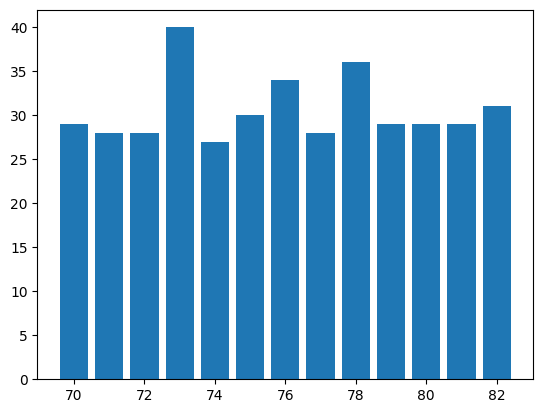

In [203]:

df_model_year_count = df['model year'].value_counts()
plt.bar(df_model_year_count.index, df_model_year_count.values)
plt.show()

**텐서플로우로 범주형 특성을 열을 만드는 방법**

model year 정보를 그룹으로 묶어서 버킷으로 나눌것이다. 


버킷리스트
- 0 : model year < 73
- 1 : 73 <= model year < 76
- 2 : 76 <= model year < 79
- 3 : model year >= 79

In [204]:
featured_year = tf.feature_column.numeric_column(key='ModelYear')
buketized_features = []
buketized_features.append(
    tf.feature_column.bucketized_column(
        source_column=featured_year,
        boundaries=[73, 76, 79]
    )
)

In [205]:
# origin 특성리스트는 0, 1, 2가 아니라 1, 2, 3으로 돼야함으로 특성열을 직접생성
feature_origin = tf.feature_column.categorical_column_with_vocabulary_list(
    key='Origin',
    vocabulary_list=[1, 2, 3])

**텐서플로우로 특성 열을 밀집 열로 바꾸기**

범주 특성 열을 밀집 열로 바꾼느 과정이다.
인디케이터 열을 범주형 열을 원-핫 인코딩 열로 바꾼다, ex (1, 2, 3) -> ([0,0,1], [0,1,0], [1,0,0])
임베딩 열은 각 인덱스를 float타입의 랜덤한 수치 벡터로 매핑한다. (이 수치벡터는 훈련될수 있다.)

범주 개수가 많을때에는 적은 차원의 임베딩 열을 사용하여 성능을 높일수 있다.

In [206]:
# 인디케이터를 이용해서 범주형 열을 -> 밀집 열로 바꾸었다.
categorical_indicator_features = []
categorical_indicator_features.append(
    tf.feature_column.indicator_column(feature_origin))

In [207]:
print(feature_origin)
print(categorical_indicator_features)

VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0)
[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=(1, 2, 3), dtype=tf.int64, default_value=-1, num_oov_buckets=0))]


**사전에 준비된 추정기로 머신러닝 수행**

*추정기 사용 단계*
- 1. 데이터 로드를 위해 입력 함수 정의
- 2. 데이터셋을 특성 열로 변환
- 3. 추정기 객체를 만들기
- 4. 추정기의 train(), evalute(), predict()메서드를 이용해서 필요한 동작수행

In [208]:
# 1. 데이터 로드를 위해 입력 함수 정의
def train_input_fn(df_train, batch_size=8):
    df = df_train.copy()
    train_x, train_y = df, df.pop('mpg')
    dataset = tf.data.Dataset.from_tensor_slices(
        dict((train_x), train_y)
    )
    return dataset.shuffle(1000).repeat().batch(batch_size)

In [210]:
df_train_norm

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.848382,-0.914499,-1.297490,-0.836116,2.855211,72.0,2.0
1,1.502690,1.579451,2.845372,1.982566,-0.534819,70.0,1.0
2,0.327154,0.062219,-0.499796,-0.438564,0.178872,70.0,1.0
3,0.327154,0.365665,-0.113815,-0.063695,0.178872,74.0,1.0
4,1.502690,2.233757,2.407927,1.655451,-1.962200,70.0,1.0
...,...,...,...,...,...,...,...
313,1.502690,1.057902,0.915468,1.505026,-0.891664,76.0,1.0
314,-0.848382,-0.971395,-1.323222,-1.384094,0.678455,76.0,3.0
315,-0.848382,-0.686914,0.272166,-0.338280,-0.713242,75.0,2.0
316,-0.848382,-0.990360,-0.860045,-1.228893,-0.534819,79.0,2.0


In [209]:
ds = train_input_fn(df_train_norm)
batch = next(iter(ds))
print('Keys:',batch[0].keys())
print('Model year:',batch[1].keys())

KeyError: 'mpg'